<a href="https://colab.research.google.com/github/JCSR2022/challenge2-data-science-Alura/blob/main/challenge2_data_science_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# challenge2-data-science-Alura

Guia para proyecto en:
https://trello.com/b/GieOySjr/challenge-telecomxlatam


estructura sugerida proyecto:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb

al final se debe incluir un informe que debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

nota: El término Churn se refiere a los indicadores o señales de insatisfacción que manifiesta un cliente antes de abandonar el servicio. Más que el cese inmediato de la relación, representa un estado crítico de descontento que actúa como detonante para la pérdida potencial del usuario. El Churn no debe entenderse solo como la pérdida definitiva del cliente, sino como el conjunto de comportamientos que advierten su intención de retiro. Identificar estas señales de fricción es fundamental para prevenir la deserción definitiva.

In [1]:
#librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pasos = "challenge2-data-science-Alura\n"

## Extracción de datos

 Los datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

 data opcion1:https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

data opcion2:'https://github.com/alura-cursos/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json'




In [3]:
# Cargar los datos directamente desde la API utilizando Python.
# Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.
# Este metodo se puede mejorar para carga eficiente vía streaming con ijson para datasets grandes

import requests
import json
import pandas as pd

url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
datos_request = requests.get(url_data)

datos_raw = json.loads(datos_request.text)
df = pd.json_normalize(datos_raw)

print(df.shape)
df.sample(5)

(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
6756,9314-IJWSQ,No,Female,0,Yes,Yes,14,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.80,1203.9
5524,7570-WELNY,No,Female,0,Yes,No,68,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Two year,Yes,Bank transfer (automatic),84.70,5711.05
230,0345-XMMUG,No,Female,0,Yes,No,46,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.90,4854.3
4480,6139-ZZRBQ,No,Male,1,No,No,64,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.05,1198.05
6375,8755-OGKNA,No,Female,0,Yes,Yes,57,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.50,1167.6


In [4]:
import pandas as pd

#en caso de querer trabajar con un archivo muy grande:
#for chunk in pd.read_json(url, lines=True, chunksize=10000):
#    df = pd.json_normalize(chunk.to_dict("records"))


url_data = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

data_raw = pd.read_json(url_data)

data = pd.json_normalize(data_raw.to_dict(orient="records"))

print(data.shape)
data.head()


(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
extraccion_pasos = """Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.\n"""

In [6]:
pasos+=extraccion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.



## Exploracion y comprobación de incoherencias en los datos

Explorar las columnas del dataset y verificar sus tipos de datos.
Consultar el diccionario para comprender mejor el significado de las variables.Identificar las columnas más relevantes para el análisis de evasión.

Verificar si hay problemas en los datos que puedan afectar el análisis: alores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

Diccionario de datos: https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_diccionario.md


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### customerID  debe ser un codigo unico


In [8]:
data['customerID'].unique().shape[0], data.shape[0]

(7267, 7267)

### Churn debe tener solo dos valores

In [9]:
data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [10]:
print(f"Cantidad de valores no definidos {data[data['Churn']==''].shape[0]}")

Cantidad de valores no definidos 224


In [11]:
# Se eliminaran las filas que no aportan informacion
data = data[data['Churn']!='']
print(data.shape[0])

7043


In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customerID, valores unicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'],object

Columna: Churn, valores unicos: ['No' 'Yes'],object

Columna: customer.gender, valores unicos: ['Female' 'Male'],object

Columna: customer.Partner, valores unicos: ['Yes' 'No'],object

Columna: customer.Dependents, valores unicos: ['Yes' 'No'],object

Columna: phone.PhoneService, valores unicos: ['Yes' 'No'],object

Columna: phone.MultipleLines, valores unicos: ['No' 'Yes' 'No phone service'],object

Columna: internet.InternetService, valores unicos: ['DSL' 'Fiber optic' 'No'],object

Columna: internet.OnlineSecurity, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.OnlineBackup, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: internet.DeviceProtection, valores unicos: ['No' 'Yes' 'No internet service'],object

Columna: internet.TechSupport, valores unicos: ['Yes' 'No' 'No internet service'],object

Columna: in

In [13]:
for col in data.columns:
    if data[col].dtype != 'object':
      print(f"Columna: {col}, valores unicos: {data[col].unique()},{data[col].dtype}")
      print()

Columna: customer.SeniorCitizen, valores unicos: [0 1],int64

Columna: customer.tenure, valores unicos: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0],int64

Columna: account.Charges.Monthly, valores unicos: [65.6  59.9  73.9  ... 91.75 68.8  67.85],float64



In [14]:
# la funcion data['account.Charges.Total'].astype(float) da problemas debido a que hay valores vacios

tmp = pd.to_numeric(data['account.Charges.Total'], errors='coerce')
n_invalid = tmp.isna().sum()
print(f"Filas no convertibles: {n_invalid}")
data[data['account.Charges.Total'].astype(str).str.strip() == ""].head(3)

Filas no convertibles: 11


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [15]:
# Conversion a float de valores validos
data.loc[:,'account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'],errors='coerce')


In [16]:
#los 11 espacios vacios quedan como valores Nan
data.isna().sum().sum()

np.int64(11)

In [17]:
#eliminacion de las filas con valores nan
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [18]:
#por algun motivo la columna no se convirtio al formato float,
# posiblemente el proceso normalize crea el df con columnas tipo contenedor
data.loc[:,'account.Charges.Total'].dtype

dtype('O')

In [19]:
#se procede a forzar recast del dtype

data['account.Charges.Total'] = pd.Series(data['account.Charges.Total'].values, dtype="float64")
data.loc[:,'account.Charges.Total'].dtype

dtype('float64')

In [20]:
#El ultimo cambio genero otros valores nan
data['account.Charges.Total'].isna().sum()

np.int64(224)

In [21]:
data = data.dropna()
data.isna().sum().sum()

np.int64(0)

In [22]:
#La columna customerID no aporta informacion por lo que se elimina
data.drop(columns=['customerID'],inplace=True)

## Análisis descriptivo valores numericos

In [23]:
numericas = [ col  for col in data.columns if data[col].dtype != 'object']
print(numericas)

['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']


In [24]:
numericas = ['customer.tenure','account.Charges.Monthly','account.Charges.Total']
data[numericas].describe()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,6808.000000,6808.000000,6808.000000
mean,32.444477,64.728400,2280.403915
std,24.570341,30.095157,2265.525050
min,1.000000,18.250000,18.800000
25%,9.000000,35.450000,399.562500
50%,29.000000,70.350000,1394.800000
75%,56.000000,89.850000,3805.137500
max,72.000000,118.750000,8684.800000


In [25]:
exploracion_pasos = """Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos\n"""

In [26]:
pasos += exploracion_pasos
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.
Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos



## Analisis de patrones

Por recomendacion de la guia del proyecto se crea al columna 'account.Charges.daily' = 'account.Charges.Monthly'/30

Ahora que se tiene la informacion limpia, se procedera a cumplir los objetivos:

* Analizar patrones asociados al abandono de clientes.

* Detectar variables clave que influyen en la cancelación.



In [27]:
analisis_patrones = "Insights encontrados:\n"

In [28]:
# creacion de columna 'account.Charges.daily'
data['account.Charges.daily'] = data['account.Charges.Total']/30

### Churn total

In [29]:
#Churn_total_porc = data[data['Churn']=='Yes'].shape[0]/data.shape[0]*100

Churn_total_porc = data['Churn'].value_counts(normalize=True).get('Yes', 0)*100

analisis_patrones += f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%\n"
print(f"Procentaje de clientes que presentan Churn: {Churn_total_porc:.2f}%")

Procentaje de clientes que presentan Churn: 26.70%


### Info cliente (Distribución de evasión)

In [30]:
#La estructura de los datos indinca que lo mejor es dividir el analisis por secciones:

cliente = [col  for col in data.columns if col.startswith('customer')]


In [31]:
#Y por el tipo de datos se separa la revision de 'tenure'
for col in cliente:
    print(col, data[col].unique())

customer.gender ['Female' 'Male']
customer.SeniorCitizen [0 1]
customer.Partner ['Yes' 'No']
customer.Dependents ['Yes' 'No']
customer.tenure [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]


#### Genero

In [32]:
#El genero no parece indicar afectacion al Churn
pd.crosstab(data['customer.gender'], data['Churn'], normalize='index') * 100

Churn,No,Yes
customer.gender,,
Female,72.937685,27.062315
Male,73.647469,26.352531


#### Edad

In [33]:
print("Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion")
df_senior = pd.crosstab(data['customer.SeniorCitizen'], data['Churn'], normalize='index') * 100
analisis_patrones += f"Clientes con mas de 65 presentan un porcentaje mayor de Churn: {df_senior.loc[1,"Yes"]:.2f}%\n"
df_senior

Que el cliente tenga edad igual o mayor a 65 años si tiene una afectacion


Churn,No,Yes
customer.SeniorCitizen,,
0,76.236408,23.763592
1,58.137432,41.862568


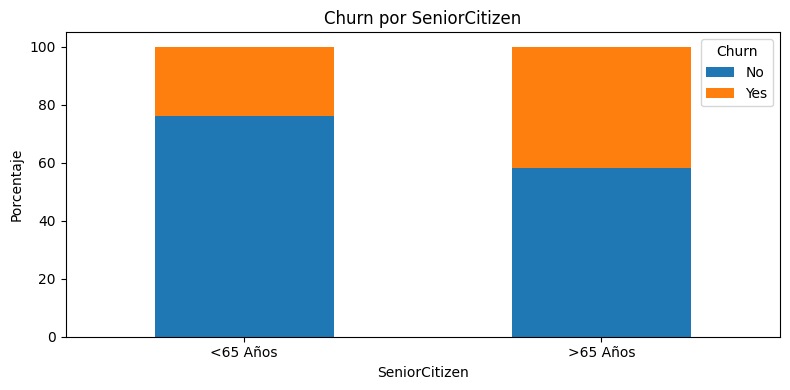

In [34]:
df_senior.index = ['<65 Años','>65 Años']

ax = df_senior.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    title='Churn por SeniorCitizen',
    ylabel='Porcentaje',
    xlabel='SeniorCitizen'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()


#### Pareja

In [35]:
df_Partner = pd.crosstab(data['customer.Partner'], data['Churn'], normalize='index') * 100
print(f"Clientes sin parejas presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin pareja presentan un porcentaje mayor de Churn: {df_Partner.loc["No","Yes"]:.2f}%\n"
df_Partner

Clientes sin parejas presentan un porcentaje mayor de Churn: 33.08%


Churn,No,Yes
customer.Partner,,
No,66.922421,33.077579
Yes,80.115537,19.884463


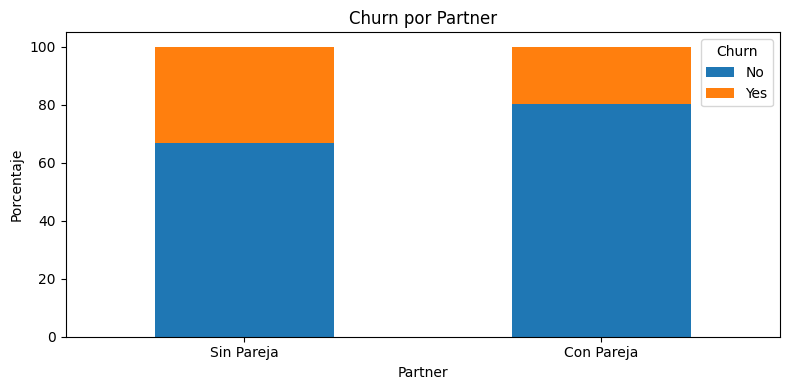

In [36]:
df_Partner.index = ['Sin Pareja','Con Pareja']
ax = df_Partner.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Churn por Partner',
    ylabel='Porcentaje',
    xlabel='Partner'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

#### Dependientes

In [37]:
df_Dependents = pd.crosstab(data['customer.Dependents'], data['Churn'], normalize='index') * 100
print(f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%")
analisis_patrones += f"Clientes sin dependientes presentan un porcentaje mayor de Churn: {df_Dependents.loc["No","Yes"]:.2f}%\n"
df_Dependents

Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%


Churn,No,Yes
customer.Dependents,,
No,68.658588,31.341412
Yes,84.272997,15.727003


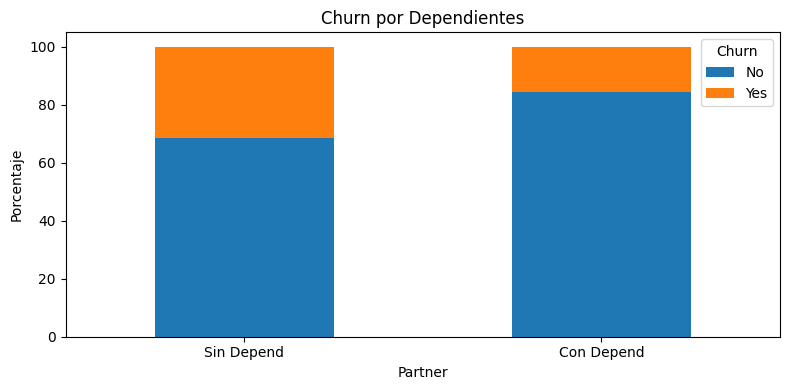

In [38]:
df_Dependents.index = ['Sin Depend','Con Depend']
ax = df_Dependents.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Churn por Dependientes',
    ylabel='Porcentaje',
    xlabel='Partner'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

#### Antiguedad

In [39]:
df_tenure = pd.crosstab(data['customer.tenure'], data['Churn'], normalize='index') * 100
df_tenure.drop(columns='No',inplace=True)
df_tenure.rename(columns={'Yes':'Churn'},inplace=True)
df_tenure.head(3), df_tenure.tail(3)

(Churn                Churn
 customer.tenure           
 1                62.057336
 2                52.173913
 3                46.391753,
 Churn               Churn
 customer.tenure          
 70               9.401709
 71               3.614458
 72               1.724138)

El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad


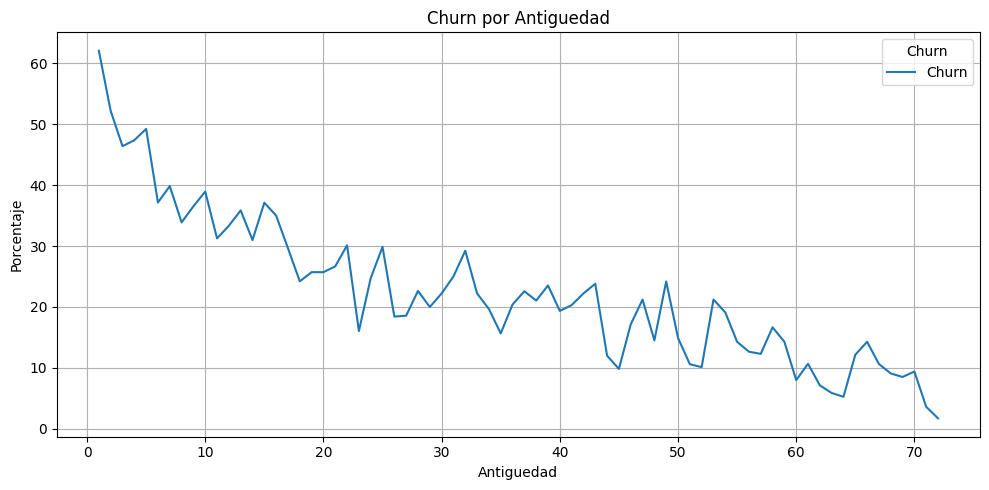

In [40]:
print(f"El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad")
analisis_patrones += "El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad\n"
ax = df_tenure.plot(
    kind='line',
    figsize=(10, 5),
    title='Churn por Antiguedad',
    ylabel='Porcentaje',
    xlabel='Antiguedad',
    grid=True
)
plt.tight_layout()

In [41]:
print(analisis_patrones)

Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad



### Info Servicio (Recuento de evasión por variables categóricas)

In [42]:
servicio = [col for col in data.columns if (col.startswith('internet') or col.startswith('phone'))]
servicio

['phone.PhoneService',
 'phone.MultipleLines',
 'internet.InternetService',
 'internet.OnlineSecurity',
 'internet.OnlineBackup',
 'internet.DeviceProtection',
 'internet.TechSupport',
 'internet.StreamingTV',
 'internet.StreamingMovies']

#### Telefonia

In [43]:
df_PhoneService = pd.crosstab(data['phone.PhoneService'], data['Churn'], normalize='index') * 100
df_PhoneService

Churn,No,Yes
phone.PhoneService,,
No,74.277017,25.722983
Yes,73.191351,26.808649


In [44]:
df_MultipleLines = pd.crosstab(data['phone.MultipleLines'], data['Churn'], normalize='index') * 100
df_MultipleLines

Churn,No,Yes
phone.MultipleLines,,
No,74.931214,25.068786
No phone service,74.277017,25.722983
Yes,71.215278,28.784722


In [45]:
analisis_patrones += "No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple\n"

#### Internet

In [46]:
df_InternetService = pd.crosstab(data['internet.InternetService'], data['Churn'], normalize='index') * 100
df_InternetService

Churn,No,Yes
internet.InternetService,,
DSL,80.690537,19.309463
Fiber optic,58.009383,41.990617
No,92.422192,7.577808


In [47]:
print("porcentaje de clientes que usan internet, Digital Subscriber Line (DSL) o linea telefonica tradicional y Fibra optica")
for option in data['internet.InternetService'].unique():
    print(f"{option}: {data[data['internet.InternetService']==option].shape[0]/data.shape[0]*100:.2f}%")

porcentaje de clientes que usan internet, Digital Subscriber Line (DSL) o linea telefonica tradicional y Fibra optica
DSL: 34.46%
Fiber optic: 43.83%
No: 21.71%


In [48]:
uso_fibra_opt = data[data['internet.InternetService']=='Fiber optic'].shape[0]/data.shape[0]*100
analisis_patrones += f"El {uso_fibra_opt:.2f}% de los clientes usa fibra optica, adicionalmente este grupo presenta el mayor nivel de Churn {df_InternetService.loc['Fiber optic','Yes']:.2f}%\n"

In [49]:
internet_services = {}
for col in ['internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV','internet.StreamingMovies']:
  internet_services[col] = pd.crosstab(data[col], data['Churn'], normalize='index') * 100

# for col,df in internet_services.items():
#   print(f"{col}:")
#   df.style
#   print()

In [50]:
from IPython.display import display

internet_services = {}

for col in [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]:
    internet_services[col] = (
        pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    )

for col, df in internet_services.items():
    display(df.style.format("{:.2f}%"))
    print("-----------------------------")


Churn,No,Yes
internet.OnlineSecurity,,
No,58.03%,41.97%
No internet service,92.42%,7.58%
Yes,85.38%,14.62%


-----------------------------


Churn,No,Yes
internet.OnlineBackup,,
No,60.05%,39.95%
No internet service,92.42%,7.58%
Yes,78.15%,21.85%


-----------------------------


Churn,No,Yes
internet.DeviceProtection,,
No,60.72%,39.28%
No internet service,92.42%,7.58%
Yes,77.30%,22.70%


-----------------------------


Churn,No,Yes
internet.TechSupport,,
No,58.26%,41.74%
No internet service,92.42%,7.58%
Yes,84.58%,15.42%


-----------------------------


Churn,No,Yes
internet.StreamingTV,,
No,66.33%,33.67%
No internet service,92.42%,7.58%
Yes,69.71%,30.29%


-----------------------------


Churn,No,Yes
internet.StreamingMovies,,
No,66.10%,33.90%
No internet service,92.42%,7.58%
Yes,69.92%,30.08%


-----------------------------


In [51]:
churn_no_internet = internet_services['internet.StreamingMovies'].loc['No internet service','Yes']
analisis_patrones += f"Los clientes sin internet presentan el nivel mas bajo de Churn {churn_no_internet:.2f}%\n"

In [52]:
for k,v in internet_services.items():
  if v.loc['No','Yes'] > 1.6*v.loc['Yes','Yes']:
    temp = f"Clientes con {k.split('.')[1]} presentan bajos niveles de churn,{v.loc['Yes','Yes']:.2f}% comparado con los que no lo usan {v.loc['No','Yes']:.2f}%"
    analisis_patrones += temp + "\n"
    print(temp)

Clientes con OnlineSecurity presentan bajos niveles de churn,14.62% comparado con los que no lo usan 41.97%
Clientes con OnlineBackup presentan bajos niveles de churn,21.85% comparado con los que no lo usan 39.95%
Clientes con DeviceProtection presentan bajos niveles de churn,22.70% comparado con los que no lo usan 39.28%
Clientes con TechSupport presentan bajos niveles de churn,15.42% comparado con los que no lo usan 41.74%


In [53]:
print(analisis_patrones)

Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad
No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple
El 43.83% de los clientes usa fibra optica, adicionalmente este grupo presenta el mayor nivel de Churn 41.99%
Los clientes sin internet presentan el nivel mas bajo de Churn 7.58%
Clientes con OnlineSecurity presentan bajos niveles de churn,14.62% comparado con los que no lo usan 41.97%
Clientes con OnlineBackup presentan bajos niveles de churn,21.85% comparado con los que no lo usan 39.95%
Clientes con DeviceProtection presentan bajos niveles de churn,22.70% comparado con los que no lo usan 39.28%
Clientes con TechSupport presentan 

### Info Cuenta (Conteo de evasión por variables numéricas)

In [54]:
cuenta = [col for col in data.columns if col.startswith('account')]
cuenta

['account.Contract',
 'account.PaperlessBilling',
 'account.PaymentMethod',
 'account.Charges.Monthly',
 'account.Charges.Total',
 'account.Charges.daily']

#### Tipo de contrato (tiempo)

In [55]:
data[['Churn','account.Contract']].head()

,Churn,account.Contract
0,No,One year
1,No,Month-to-month
2,Yes,Month-to-month
3,Yes,Month-to-month
4,Yes,Month-to-month


In [56]:
#solo por hacerlo diferente
#df_contract = pd.crosstab(data['account.Contract'],data['Churn'],normalize='index') * 100

tabla = data.groupby(['account.Contract', 'Churn']).size().unstack()
df_contract = tabla.div(tabla.sum(axis=1), axis=0) * 100
df_contract

Churn,No,Yes
account.Contract,,
Month-to-month,57.173333,42.826667
One year,88.483146,11.516854
Two year,97.062424,2.937576


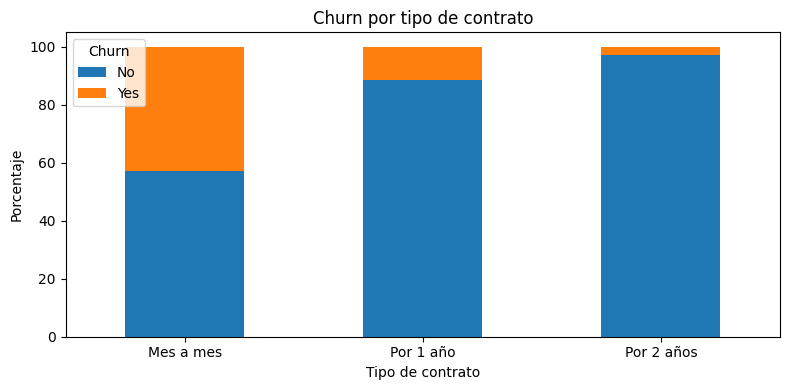

In [57]:
df_contract.index = ['Mes a mes','Por 1 año','Por 2 años']
ax = df_contract.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Churn por tipo de contrato',
    ylabel='Porcentaje',
    xlabel='Tipo de contrato'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

In [58]:
analisis_patrones +=  f"Los clientes que tienen contrato mes por mes son lo que presentan el mayor nivel de Churn: {df_contract.loc['Mes a mes','Yes']:.2f}%\n"

In [59]:
analisis_patrones +=  f"Los clientes que tienen contrato por dos años son lo que presentan el menor nivel de Churn: {df_contract.loc['Por 2 años','Yes']:.2f}%\n"

#### Facturacion fisica

In [60]:
#pd.crosstab(data['account.PaperlessBilling'],data['Churn'],normalize='index') * 100
tabla = data.groupby(['account.PaperlessBilling', 'Churn']).size().unstack()
df_PaperlessBilling = tabla.div(tabla.sum(axis=1), axis=0) * 100
df_PaperlessBilling

Churn,No,Yes
account.PaperlessBilling,,
No,83.453497,16.546503
Yes,66.311353,33.688647


In [61]:
analisis_patrones +=  f"Los clientes que trabajan con facturas en fisico presenta mayor nivel de Churn: {df_PaperlessBilling.loc['Yes','Yes']:.2f}% vs los que no usan {df_PaperlessBilling.loc['No','Yes']:.2f}%\n"

In [62]:
print(analisis_patrones)

Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad
No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple
El 43.83% de los clientes usa fibra optica, adicionalmente este grupo presenta el mayor nivel de Churn 41.99%
Los clientes sin internet presentan el nivel mas bajo de Churn 7.58%
Clientes con OnlineSecurity presentan bajos niveles de churn,14.62% comparado con los que no lo usan 41.97%
Clientes con OnlineBackup presentan bajos niveles de churn,21.85% comparado con los que no lo usan 39.95%
Clientes con DeviceProtection presentan bajos niveles de churn,22.70% comparado con los que no lo usan 39.28%
Clientes con TechSupport presentan 

#### Metodo de pago

In [63]:
tabla = data.groupby(['account.PaymentMethod', 'Churn']).size().unstack()
df_PaymentMethod = tabla.div(tabla.sum(axis=1), axis=0) * 100
df_PaymentMethod


Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),83.266399,16.733601
Credit card (automatic),84.745763,15.254237
Electronic check,54.652687,45.347313
Mailed check,80.322581,19.677419


In [64]:
analisis_patrones +=  f"Los clientes que usan cheques electronicos presenta mayor nivel de Churn: {df_PaymentMethod.loc['Electronic check','Yes']:.2f}%\n"

#### Pagos - cargos

Se va a discretizar (binning) la variable continua account.Charges.Monthly en intervalos y luego hacer el crosstab por rango en vez de por valor exacto.

In [65]:
data_Charges_Monthly = data[['account.Charges.Monthly','Churn']]
data_Charges_Monthly.sample(5)

,account.Charges.Monthly,Churn
5508,55.30,Yes
2115,69.45,No
376,20.50,No
6910,56.25,No
3030,44.95,Yes


In [66]:
min_val = data_Charges_Monthly['account.Charges.Monthly'].min()
max_val = data_Charges_Monthly['account.Charges.Monthly'].max()
x = 10  # cantidad de intermedios

paso = (max_val - min_val) / (x + 1)
bins = [round(min_val + i * paso, 2) for i in range(x + 2)]
print(bins)
intervalos = [ f"{bins[i-1]}-{bins[i]}[$]" for i in range(1,len(bins))]
print( intervalos )

[18.25, 27.39, 36.52, 45.66, 54.8, 63.93, 73.07, 82.2, 91.34, 100.48, 109.61, 118.75]
['18.25-27.39[$]', '27.39-36.52[$]', '36.52-45.66[$]', '45.66-54.8[$]', '54.8-63.93[$]', '63.93-73.07[$]', '73.07-82.2[$]', '82.2-91.34[$]', '91.34-100.48[$]', '100.48-109.61[$]', '109.61-118.75[$]']


In [67]:
#data_Charges_Monthly = data_Charges_Monthly.drop(columns='Charges_Bin', errors='ignore')
data_Charges_Monthly.loc[:,'Charges_Bin'] = pd.cut(data_Charges_Monthly['account.Charges.Monthly'],bins=bins,include_lowest=True)
data_Charges_Monthly.sample(5)

/tmp/ipython-input-2746106429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Charges_Monthly.loc[:,'Charges_Bin'] = pd.cut(data_Charges_Monthly['account.Charges.Monthly'],bins=bins,include_lowest=True)


,account.Charges.Monthly,Churn,Charges_Bin
5207,89.25,No,"(82.2, 91.34]"
3232,80.70,No,"(73.07, 82.2]"
1147,94.55,Yes,"(91.34, 100.48]"
4437,81.20,No,"(73.07, 82.2]"
2496,24.70,No,"(18.249, 27.39]"


In [68]:
df_Charges_Monthly = pd.crosstab(
    data_Charges_Monthly['Charges_Bin'],
    data_Charges_Monthly['Churn'],
    normalize='index'
) * 100
#df_Charges_Monthly.sort_values(by='Yes',ascending=False,inplace=True)
df_Charges_Monthly

Churn,No,Yes
Charges_Bin,,
"(18.249, 27.39]",90.598841,9.401159
"(27.39, 36.52]",69.565217,30.434783
"(36.52, 45.66]",68.666667,31.333333
"(45.66, 54.8]",73.305955,26.694045
"(54.8, 63.93]",82.648402,17.351598
"(63.93, 73.07]",71.404959,28.595041
"(73.07, 82.2]",62.150056,37.849944
"(82.2, 91.34]",64.000000,36.000000
"(91.34, 100.48]",59.858156,40.141844


In [69]:
df_Charges_Monthly.sort_values(by='Yes',ascending=False).head(3)

Churn,No,Yes
Charges_Bin,,
"(91.34, 100.48]",59.858156,40.141844
"(73.07, 82.2]",62.150056,37.849944
"(82.2, 91.34]",64.000000,36.000000


/tmp/ipython-input-892497698.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


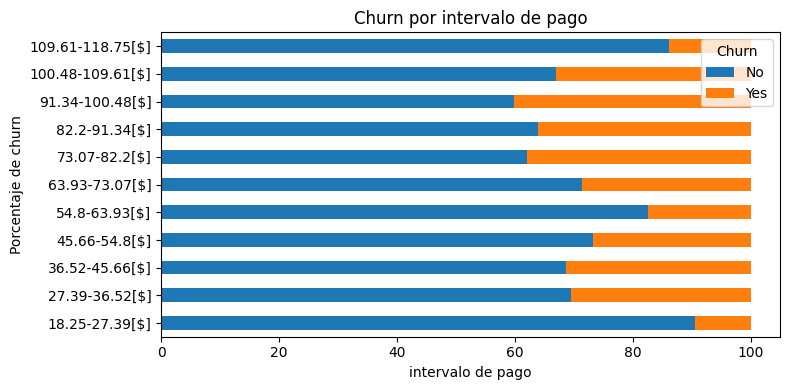

In [70]:
df_Charges_Monthly.index = intervalos
ax = df_Charges_Monthly.plot(
    kind='barh',
    stacked=True,
    figsize=(8,4),
    title='Churn por intervalo de pago',
    ylabel='Porcentaje de churn',
    xlabel='intervalo de pago'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()

/tmp/ipython-input-401712042.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[(51.75, 68.5], (51.75, 68.5], (68.5, 85.25], (85.25, 102.0], (68.5, 85.25], ..., (68.5, 85.25], (68.5, 85.25], (102.0, 118.75], (85.25, 102.0], (85.25, 102.0]]
Length: 6808
Categories (6, interval[float64, right]): [(18.249, 35.0] < (35.0, 51.75] < (51.75, 68.5] <
                                           (68.5, 85.25] < (85.25, 102.0] < (102.0, 118.75]]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  data_Charges_Monthly.loc[:,'Charges_Bin'] = pd.cut(data_Charges_Monthly['account.Charges.Monthly'],bins=bins,include_lowest=True)


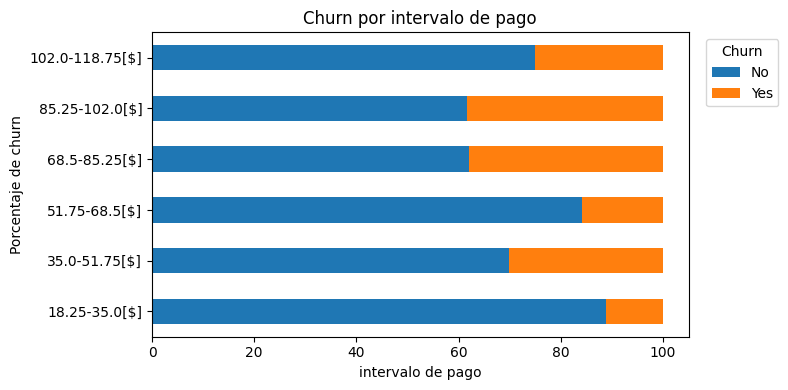

In [71]:
def plot_dicr_Charges_Monthly(df_Charges_Monthly,x=5):
  min_val = data_Charges_Monthly['account.Charges.Monthly'].min()
  max_val = data_Charges_Monthly['account.Charges.Monthly'].max()
  paso = (max_val - min_val) / (x + 1)
  bins = [round(min_val + i * paso, 2) for i in range(x + 2)]
  intervalos = [ f"{bins[i-1]}-{bins[i]}[$]" for i in range(1,len(bins))]

  data_Charges_Monthly.loc[:,'Charges_Bin'] = pd.cut(data_Charges_Monthly['account.Charges.Monthly'],bins=bins,include_lowest=True)
  df_Charges_Monthly = pd.crosstab(data_Charges_Monthly['Charges_Bin'],data_Charges_Monthly['Churn'],normalize='index') * 100

  df_Charges_Monthly.index = intervalos
  ax = df_Charges_Monthly.plot(
      kind='barh',
      stacked=True,
      figsize=(8,4),
      title='Churn por intervalo de pago',
      ylabel='Porcentaje de churn',
      xlabel='intervalo de pago'
  )

  ax.legend(
    title='Churn',
    bbox_to_anchor=(1.02, 1),   # posición
    loc='upper left')

  plt.tight_layout()

  return df_Charges_Monthly


df_Charges_Monthly2 = plot_dicr_Charges_Monthly(df_Charges_Monthly,5)

In [72]:
df_Charges_Monthly2.sort_values(by='Yes',ascending=False)

Churn,No,Yes
85.25-102.0[$],61.722142,38.277858
68.5-85.25[$],62.066752,37.933248
35.0-51.75[$],69.770774,30.229226
102.0-118.75[$],75.000000,25.000000
51.75-68.5[$],84.177215,15.822785
18.25-35.0[$],88.869048,11.130952


In [73]:
df_Charges_sorted = df_Charges_Monthly2.sort_values(by='Yes',ascending=False)
df_Charges_sorted.index[0],df_Charges_sorted.iloc[0,1]
analisis_patrones += f"Los clientes que pagan mensualmente entre {df_Charges_sorted.index[0]} presentan el mayor nivel de churn {df_Charges_sorted.iloc[0,1]}\n"

#### Cargos totales

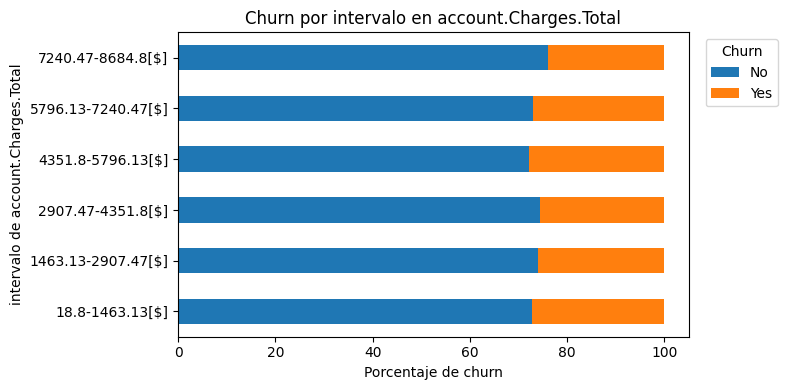

In [74]:

def plot_discr(data,col ='account.Charges.Total' ,x=5):
  min_val = data[col].min()
  max_val = data[col].max()
  paso = (max_val - min_val) / (x + 1)
  bins = [round(min_val + i * paso, 2) for i in range(x + 2)]
  intervalos = [ f"{bins[i-1]}-{bins[i]}[$]" for i in range(1,len(bins))]
  data_disc = data[[col,'Churn']].copy()
  data_disc.loc[:,'Bin'] = pd.cut(data_disc[col],bins=bins,include_lowest=True)
  df_disc = pd.crosstab(data_disc['Bin'],data_disc['Churn'],normalize='index') * 100

  df_disc.index = intervalos
  ax = df_disc.plot(
      kind='barh',
      stacked=True,
      figsize=(8,4),
      title=f'Churn por intervalo en {col}',
      ylabel=f'intervalo de {col}',
      xlabel='Porcentaje de churn'
  )

  ax.legend(
    title='Churn',
    bbox_to_anchor=(1.02, 1),   # posición
    loc='upper left')

  plt.tight_layout()

  return df_disc

df_Charges_Total = plot_discr(data,'account.Charges.Total' ,5)

In [75]:
df_Charges_Total

Churn,No,Yes
18.8-1463.13[$],72.879909,27.120091
1463.13-2907.47[$],74.010791,25.989209
2907.47-4351.8[$],74.412533,25.587467
4351.8-5796.13[$],72.247360,27.752640
5796.13-7240.47[$],72.908367,27.091633
7240.47-8684.8[$],76.095618,23.904382


In [76]:
analisis_patrones += f"No existe diferencia en el nivel de chur con relacion a los cargos totales de Los clientes\n"

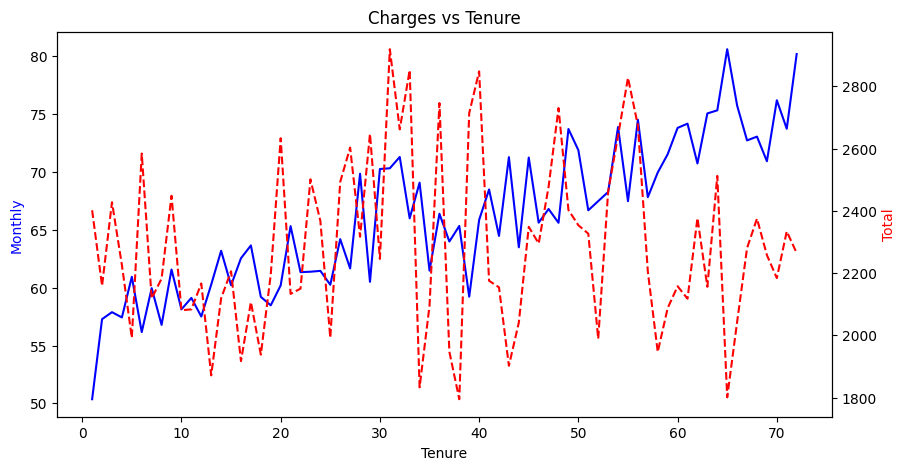

In [77]:
# no parece haber relacion entre Tenure, cargos mensuales y cargos totales
df_tenure_charges =  data.groupby('customer.tenure').agg({'account.Charges.Monthly':'mean','account.Charges.Total':'mean'})

fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()

ax1.plot(
    df_tenure_charges.index,
    df_tenure_charges['account.Charges.Monthly'],
    label="Monthly",
    color = 'blue'
)

ax2.plot(
    df_tenure_charges.index,
    df_tenure_charges['account.Charges.Total'],
    linestyle="--",
    label="Total",
    color = 'red'
)

ax1.set_xlabel("Tenure")
ax1.set_ylabel("Monthly",color='blue')
ax2.set_ylabel("Total",color='red')

plt.title("Charges vs Tenure")
plt.show()

In [78]:
pasos += analisis_patrones
print(pasos)

challenge2-data-science-Alura
Extraccion de datos:
Se realizo la la descarga del archivo con pd.read_json y luego se normalizo usando pd.json_normalize.
Exploracion:
Se realizo la exploracion de los datos con data.info()
 -se eliminaron filas donde la columna churn no tenia informacion
 -se eliminaron filas que en columna account.Charges.Total no tenian valor y se convirtio a float
 -se eliminaron filas con valores nulos
 -La columna customerID no aporta informacion por lo que se elimina
 -No quedan valores nulos
Insights encontrados:
Procentaje de clientes que presentan Churn: 26.70%
Clientes con mas de 65 presentan un porcentaje mayor de Churn: 41.86%
Clientes sin pareja presentan un porcentaje mayor de Churn: 33.08%
Clientes sin dependientes presentan un porcentaje mayor de Churn: 31.34%
El Churn presenta una relacion exponencial decreciente con respecto a la antiguedad
No existe relacion entre el churn y si el cliente tiene servicio de telefonia unica o multiple
El 43.83% de los cl

## Insights y Accionables

Tras el análisis descriptivo, se identificaron los siguientes patrones de comportamiento:

### **Perfil Demográfico y Riesgo**

* **Tasa General:** El **26.70%** de la base de clientes ha desertado.
* **Segmentos Vulnerables:** El abandono es significativamente mayor en personas mayores de 65 años (**41.86%**), personas sin pareja (**33.08%**) y sin dependientes (**31.34%**).

### **Comportamiento del Servicio**

* **Antigüedad:** Existe una relación exponencial decreciente; a menor tiempo en la empresa, mayor es la probabilidad de fuga.
* **Conectividad:** Los usuarios de **Fibra Óptica** presentan una tasa de deserción alarmante del **41.99%**, a pesar de representar casi el 44% de la base.
* **Servicios de Valor Añadido (VAS):** La seguridad online, los backups y el soporte técnico reducen drásticamente el *churn* (promedio de ~15-20% frente a ~40% de quienes no los tienen).

### **Factores Contractuales y de Pago**

* **Tipo de Contrato:** Los contratos mes a mes son el mayor punto de fuga (**42.83%**), mientras que los contratos a dos años son los más estables (**2.94%**).
* **Métodos de Pago:** El uso de cheque electrónico dispara el riesgo al **45.35%**.
* **Cargos Mensuales:** El segmento que paga entre **$85.25 y $102.0** es el más propenso a retirarse.

---

## **Recomendaciones Estratégicas**

Basadas en los datos, se sugieren las siguientes líneas de acción:

1. **Migración Contractual:** Incentivar la transición de contratos mensuales a anuales mediante beneficios exclusivos o descuentos por permanencia.
2. **Optimización de Pagos:** Promover la adopción de métodos de pago automáticos para desplazar el uso del cheque electrónico.
3. **Blindaje de Servicios:** Empaquetar los servicios de *"Online Security"* y *"Tech Support"* en los planes básicos de fibra óptica, dado que actúan como retenedores críticos.

---

## **Acciones de Corto Plazo**

* **Onboarding:** Acompañar al cliente en los primeros 90 días para mitigar la curva exponencial de abandono.
* **Auditoría de Fibra Óptica:** Investigar si el *churn* en fibra se debe a problemas técnicos o de precio en el rango de **$85 - $102**.
* **Incentivo de Pago:** Ofrecer un bono único a clientes que migren de cheque electrónico a débito automático.
* **Programa Silver:** Crear programas de fidelización específicos para el segmento de mayores de 65 años.

## Transformacion


Preparar los datos para futuros modelos de Machine Learning.

Para columnas con múltiples categorías sin orden natural, como PaymentMethod, la opción más adecuada es One-Hot Encoding, ya que evita introducir una relación numérica artificial entre las categorías y permite que el modelo las trate de forma independiente, lo cual es especialmente importante en modelos lineales y basados en distancia; aunque aumenta la dimensionalidad, en este caso no suele ser un problema porque el número de categorías es reducido, por lo que resulta una solución más segura y alineada con buenas prácticas que usar una simple codificación numérica.

In [79]:
data.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total',
       'account.Charges.daily'],
      dtype='object')

In [93]:
#segun la revision prelimnar, las variables que seberiamos analizar son:
col = ['Churn','customer.SeniorCitizen','customer.Partner', 'customer.Dependents', 'customer.tenure','internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport','account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod','account.Charges.Monthly','account.Charges.daily']

In [94]:
#1. Copia de Seguridad del Dataset
df_ML = data[col].copy()

In [96]:
#2. Renombrar Columnas (Data Cleaning & Interpretabilidad)

df_ML.columns = (
    df_ML.columns
    .str.replace('.', '_', regex=False)
    .str.lower()
)


In [98]:
#3 Convertir Target (Churn) a Binario
churn_map = {'Yes':1, 'No':0}
df_ML['churn'] = df_ML['churn'].map(churn_map )


In [100]:
# 4 Convertir Variables Binarias a 0 y 1
#"No internet service" implica que el servicio no está activo → equivale funcionalmente a "No".

binarias = [
    'customer_partner',
    'customer_dependents',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'account_paperlessbilling'
]
map_bin = {'Yes':1, 'No':0, 'No internet service':0}
for col in binarias:
    df_ML[col] = df_ML[col].map(map_bin)

#SeniorCitizen ya es Binaria
df_ML['customer_seniorcitizen'] = df_ML['customer_seniorcitizen'].astype(int)

In [103]:
# 5. One-Hot Encoding para Variables Nominales

df_ML = pd.get_dummies(
    df_ML,
    columns=[
        'internet_internetservice',
        'account_contract',
        'account_paymentmethod'
    ],
    drop_first=True
)

#¿Por qué drop_first=True?Evita: Multicolinealidad (Dummy Variable Trap). Problemas en regresión logística


In [105]:
# 6. Normalización de Variables Numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numericas = [
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_daily'
]

df_ML[numericas] = scaler.fit_transform(df_ML[numericas])


In [107]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6808 entries, 0 to 7030
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   churn                                          6808 non-null   int64  
 1   customer_seniorcitizen                         6808 non-null   int64  
 2   customer_partner                               6808 non-null   int64  
 3   customer_dependents                            6808 non-null   int64  
 4   customer_tenure                                6808 non-null   float64
 5   internet_onlinesecurity                        6808 non-null   int64  
 6   internet_onlinebackup                          6808 non-null   int64  
 7   internet_deviceprotection                      6808 non-null   int64  
 8   internet_techsupport                           6808 non-null   int64  
 9   account_paperlessbilling                       6808 non-n

## Extra:Análisis de correlación entre variables

Detectar multicolinealidad

Identificar variables más relacionadas con churn

Encontrar redundancias

Detectar posibles variables derivadas (ej: monthly vs daily charges)

Como estamos trabajando con df_ML ya transformado (todo numérico), podemos aplicar directamente correlación de Pearson.

In [82]:
"""
La mejor opción aquí es:

Heatmap con matriz triangular
Centrado en 0
Colormap divergente (rojo-azul)
Anotaciones numéricas
Ordenado por correlación con churn
"""

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

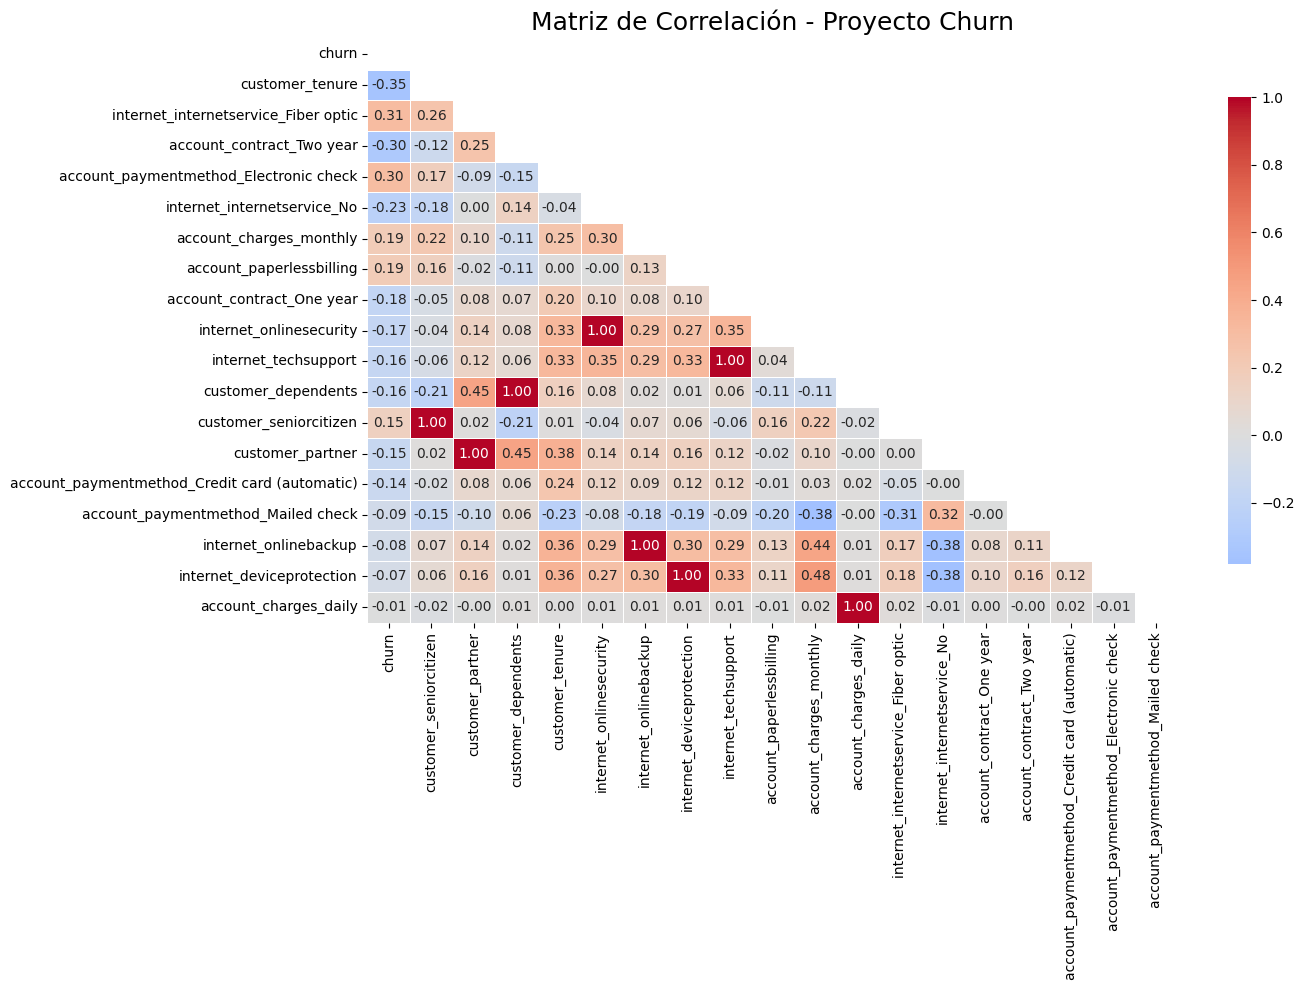

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_matriz_correlacion(df_ML):

    # ==========================
    # 1️⃣ Matriz de correlación
    # ==========================

    corr = df_ML.corr(method='pearson')

    # ==========================
    # 2️⃣ Ordenar por correlación con churn
    # ==========================

    corr = corr.loc[
        corr['churn'].abs().sort_values(ascending=False).index
    ]

    # ==========================
    # 3️⃣ Máscara triangular
    # ==========================

    mask = np.triu(np.ones_like(corr, dtype=bool))

    # ==========================
    # 4️⃣ Visualización
    # ==========================

    plt.figure(figsize=(14,10))

    sns.heatmap(
        corr,
        mask=mask,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )

    plt.title("Matriz de Correlación - Proyecto Churn", fontsize=18)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()

    return plt

plot_matriz_correlacion(df_ML)

De la matriz de correlacion se confirma el analisis preliminar:

| Variable                               | Corr con Churn | Interpretación                           |
| -------------------------------------- | -------------- | ---------------------------------------- |
| customer_tenure                        | **-0.35**      | Mayor antigüedad → menor churn           |
| internet_internetservice_Fiber optic   | **0.30**       | Clientes con fibra cancelan más          |
| account_paymentmethod_Electronic check | **0.30**       | Método de pago más riesgoso              |
| account_contract_Two year              | **-0.30**      | Contrato largo reduce churn              |
| internet_internetservice_No            | **-0.23**      | Clientes sin internet cancelan menos     |
| account_paperlessbilling               | 0.19           | Facturación digital = más churn          |
| account_charges_monthly                | 0.19           | Más cargo mensual = más churn            |
| internet_onlinesecurity                | -0.17          | Seguridad reduce churn                   |
| internet_techsupport                   | -0.16          | Soporte reduce churn                     |
| customer_dependents                    | -0.16          | Clientes con dependientes cancelan menos |
